# Solving the Titanic

## Workflow

The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Validate, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
- Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.


## Question and problem definition

Competition sites like Kaggle define the problem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The question or problem definition for Titanic Survival competition is [described here at Kaggle](https://www.kaggle.com/c/titanic).

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

We may also want to develop some early understanding about the domain of our problem. This is described on the [Kaggle competition description page here](https://www.kaggle.com/c/titanic). Here are the highlights to note.

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a [correlation](https://en.wikiversity.org/wiki/Correlation) among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf

# Set seed for reproducibility
seed = 7
np.random.seed(seed)

## Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [2]:
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
combine = [train_df, test_df]

## Analyze by describing data

Pandas also helps describe the datasets answering following questions early in our project.

**Which features are available in the dataset?**

Noting the feature names for directly manipulating or analyzing these. These feature names are described on the [Kaggle data page here](https://www.kaggle.com/c/titanic/data).

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

- Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

**Which features are numerical?**

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

- Continous: Age, Fare. Discrete: SibSp, Parch.

In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Which features contain blank, null or empty values?**

These will require correcting.

- Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
- Cabin > Age are incomplete in case of test dataset.

**What are the data types for various features?**

Helping us during converting goal.

- Seven features are integer or floats. Six in case of test dataset.
- Five features are strings (object).

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- <=50% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with some passengers paying as high as $512.

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What is the distribution of categorical features?**

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Salkjelsvik, Miss. Anna Kristine",male,1601,B96 B98,S
freq,1,577,7,4,644


### Assumptions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating.**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing.**

1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correcting.**

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating.**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.
1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived. 
3. The upper-class passengers (Pclass=1) were more likely to have survived.

## Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Observations
- **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

## Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations to analyze the data.
### Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

**Observations.**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- We should band age groups (creating #3).

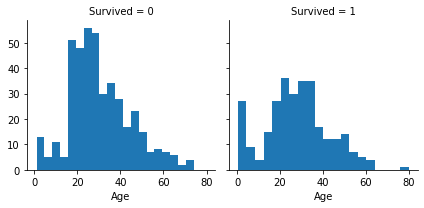

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

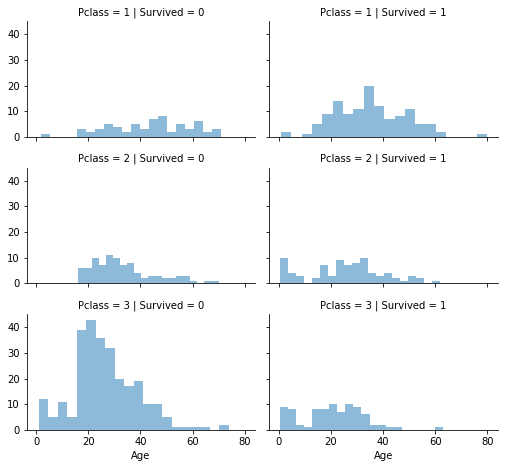

In [14]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Observations.**

- Pclass=3 had most passengers, however most did not survive. Confirms assumption that upper class was more likely to survive
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further confirms our assumptions
- Most passengers in Pclass=1 survived. Also confirms our assumptions
- Pclass varies in terms of Age distribution of passengers.

**Decisions.**

- Consider Pclass for model training.

## Validate, prepare, cleanse the data.

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

### Correcting by dropping features
Based on our assumptions and decisions we want to drop the Cabin, Ticket and passengerId features.
Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [15]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

# Make copy of passengerId's for result submission.
testPassengerIds = test_df['PassengerId']
train_df = train_df.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 8), (418, 7), (891, 8), (418, 7))

### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation.  
Our training dataset has two missing values. We simply fill these with the most common occurance.

In [16]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port 

'S'

In [17]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

### Converting a categorical feature

Now we can convert features which contain strings representing types to numerical values.   
This is required by most model algorithms.   

In [18]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
train_df = pd.get_dummies(train_df, columns = ["Sex", "Embarked"])
test_df = pd.get_dummies(test_df, columns = ["Sex", "Embarked"])
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We should prefer method 2.  
For simplicity however. We will fill age with median.

In [20]:
median = train_df.append(test_df, sort='False').dropna()['Age'].median()

combine = [train_df, test_df]
for dataset in combine:
    dataset['Age'].fillna(median, inplace=True)

train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets and simplify the data for the algorithms

In [21]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [22]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and IsAlone features in favor of FamilySize

In [23]:
train_df = train_df.drop(['Parch', 'SibSp', 'IsAlone'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'IsAlone'], axis=1)
#train_df = train_df.drop(['Parch', 'SibSp', 'IsAlone'], axis=1)
#test_df = test_df.drop(['Parch', 'SibSp', 'IsAlone'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,3,22.0,7.2500,0,1,0,0,1,2
1,1,1,38.0,71.2833,1,0,1,0,0,2
2,1,3,26.0,7.9250,1,0,0,0,1,1
3,1,1,35.0,53.1000,1,0,0,0,1,2
4,0,3,35.0,8.0500,0,1,0,0,1,1


### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [45]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,34.5,7.8292,0,1,0,1,0,1
1,3,47.0,7.0000,1,0,0,0,1,2
2,2,62.0,9.6875,0,1,0,1,0,1
3,3,27.0,8.6625,0,1,0,0,1,1
4,3,22.0,12.2875,1,0,0,0,1,3


## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

We will use:

- Logistic regression
- Decision tree
- SVM
- Artificial Neural Network


In [46]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test  = test_df
X_train.shape, y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [47]:
# Logistic Regression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(f'Accuracy: {acc_log}%')

Accuracy: 80.13%


c:\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [48]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,Sex_female,1.824183
5,Embarked_C,0.548612
6,Embarked_Q,0.271888
7,Embarked_S,0.120019
2,Fare,0.002341
1,Age,-0.034471
8,FamilySize,-0.186275
4,Sex_male,-0.883663
0,Pclass,-1.003876


- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [49]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train, )
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(f"Accuracy: {acc_decision_tree}%")

Accuracy: 97.98%


In [29]:
dot_data = tree.export_graphviz(decision_tree, out_file="dot", feature_names=X_train.columns.values)
#Show decision tree

So far we've seen the accuracy of our models which was about 79 for logistic regression, and 90% for decision trees.  
Do you think these results will generalize to the general population? 












# Validation
We should validate the model to see how well it generalizes on unseen data.  
The simplest way is by leaving out test/validation samples.

In [30]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]

(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train, test_size = 0.1)



decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
val_acc_decision_tree = round(decision_tree.score(X_val, y_val) * 100, 2)

print(f"Accuracy: {acc_decision_tree}")
print(f"validated accuracy: {val_acc_decision_tree}")

Accuracy: 98.0
validated accuracy: 80.0


In [31]:
y_val_pred = decision_tree.predict(X_val)

plt.figure
cm = confusion_matrix(y_val, y_val_pred)

cm_df = pd.DataFrame(cm, index = ['Did not survive', 'Survived'], columns=['Did not survive', 'Survived'])
cm_df
# Left = true Top = Predicted

,Did not survive,Survived
Did not survive,50,7
Survived,11,22


We then find a more realistic number, less than we originally saw. 
When a model performs well on the training set, but fails to perform(generalize) on unseen data we call this overfitting.  
Although a lot of algorithms can suffer from overfitting, decision trees are some of the worst

The best fix against overfitting is more data. Adjusting training parameters can also help slightly.

## K-Fold Cross validation
Now if we split, train and validate our model a few times we can see there is a significant change in rating.   
This is why, if possible, you should use cross validation.   
Cross validation is done by splitting (whilst keeping a balance in classes), training and validating a model x times.  
Cross validation is considered to be the 'golden standard' for validation.   
The downside is performance, since you now have to perform this operation X times..  

In [32]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]


Text(0.5, 1.0, 'Average score: 78.46%')

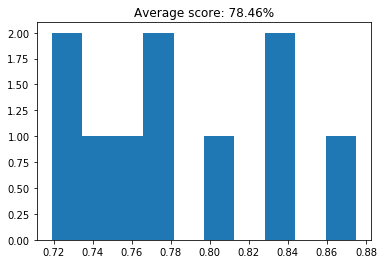

In [33]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, X_train, y_train, cv=10)
acc_decision_tree = round(np.mean(cv_scores) * 100, 2)
plt.hist(cv_scores)
plt.title('Average score: {}%'.format(acc_decision_tree))

Text(0.5, 1.0, 'Average score: 79.58%')

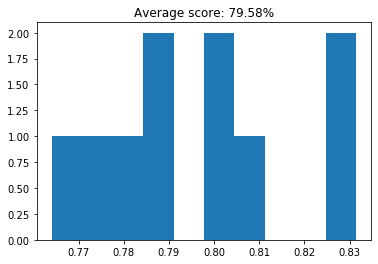

In [50]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=10)
acc_log = round(np.mean(cv_scores) * 100, 2)
plt.hist(cv_scores)
plt.title('Average score: {}%'.format(acc_log))

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

https://scikit-learn.org/0.18/_images/sphx_glr_plot_iris_001.png  
Note that the model generates a confidence score which is higher than Logistics Regression model.

## Normalizing the data
Now on to the support vector machine and Artifical Neural network. 
Both of these algorithms tend to perform better when the data is normalized. (Although there are exceptions depending upon the data)  
Normalized means the data units are on the same scale.

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Text(0.5, 1.0, 'Average score: 81.6%')

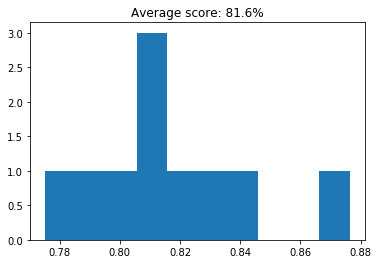

In [36]:
# Support Vector Machines

svc = SVC(gamma='auto', kernel='rbf')
cv_scores = cross_val_score(svc, X_train, y_train, cv=10)
acc_svc = round(np.mean(cv_scores) * 100, 2)
plt.hist(cv_scores)
plt.title('Average score: {}%'.format(acc_svc))


### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [51]:
def create_model():
    model = tf.keras.models.Sequential([

      tf.keras.layers.Dense(9, input_dim=9),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model();

history = model.fit(X_train, y_train.values, epochs=200, validation_split=0.2)


Train on 712 samples, validate on 179 samples
Epoch 1/200
712/712 [==============================] - 0s 303us/sample - loss: 3.5751 - accuracy: 0.3357 - val_loss: 2.8986 - val_accuracy: 0.4078
Epoch 2/200
712/712 [==============================] - 0s 54us/sample - loss: 2.1660 - accuracy: 0.5281 - val_loss: 1.6280 - val_accuracy: 0.5531
Epoch 3/200
712/712 [==============================] - 0s 58us/sample - loss: 1.2123 - accuracy: 0.5674 - val_loss: 1.0265 - val_accuracy: 0.5978
Epoch 4/200
712/712 [==============================] - 0s 68us/sample - loss: 0.9921 - accuracy: 0.6138 - val_loss: 0.9006 - val_accuracy: 0.6480
Epoch 5/200
712/712 [==============================] - 0s 61us/sample - loss: 0.9406 - accuracy: 0.6433 - val_loss: 0.8737 - val_accuracy: 0.6760
Epoch 6/200
712/712 [==============================] - 0s 57us/sample - loss: 0.9138 - accuracy: 0.6573 - val_loss: 0.8521 - val_accuracy: 0.6760
Epoch 7/200
712/712 [==============================] - 0s 62us/sample - loss:

712/712 [==============================] - 0s 66us/sample - loss: 0.4651 - accuracy: 0.7907 - val_loss: 0.3871 - val_accuracy: 0.8324
Epoch 56/200
712/712 [==============================] - 0s 69us/sample - loss: 0.4641 - accuracy: 0.7935 - val_loss: 0.3834 - val_accuracy: 0.8324
Epoch 57/200
712/712 [==============================] - 0s 62us/sample - loss: 0.4643 - accuracy: 0.7949 - val_loss: 0.3836 - val_accuracy: 0.8380
Epoch 58/200
712/712 [==============================] - 0s 64us/sample - loss: 0.4625 - accuracy: 0.7879 - val_loss: 0.3787 - val_accuracy: 0.8492
Epoch 59/200
712/712 [==============================] - 0s 60us/sample - loss: 0.4608 - accuracy: 0.8062 - val_loss: 0.4055 - val_accuracy: 0.8045
Epoch 60/200
712/712 [==============================] - 0s 66us/sample - loss: 0.4724 - accuracy: 0.7809 - val_loss: 0.3886 - val_accuracy: 0.8268
Epoch 61/200
712/712 [==============================] - 0s 61us/sample - loss: 0.4680 - accuracy: 0.7865 - val_loss: 0.3890 - val_a

Epoch 111/200
712/712 [==============================] - 0s 68us/sample - loss: 0.4621 - accuracy: 0.7907 - val_loss: 0.3788 - val_accuracy: 0.8547
Epoch 112/200
712/712 [==============================] - 0s 64us/sample - loss: 0.4618 - accuracy: 0.7921 - val_loss: 0.3760 - val_accuracy: 0.8436
Epoch 113/200
712/712 [==============================] - 0s 61us/sample - loss: 0.4529 - accuracy: 0.7949 - val_loss: 0.3815 - val_accuracy: 0.8268
Epoch 114/200
712/712 [==============================] - 0s 65us/sample - loss: 0.4634 - accuracy: 0.7893 - val_loss: 0.3715 - val_accuracy: 0.8380
Epoch 115/200
712/712 [==============================] - 0s 60us/sample - loss: 0.4567 - accuracy: 0.7949 - val_loss: 0.3684 - val_accuracy: 0.8436
Epoch 116/200
712/712 [==============================] - 0s 66us/sample - loss: 0.4532 - accuracy: 0.8034 - val_loss: 0.3750 - val_accuracy: 0.8380
Epoch 117/200
712/712 [==============================] - 0s 67us/sample - loss: 0.4542 - accuracy: 0.7963 - val_

712/712 [==============================] - 0s 65us/sample - loss: 0.4634 - accuracy: 0.7837 - val_loss: 0.3694 - val_accuracy: 0.8492
Epoch 167/200
712/712 [==============================] - 0s 68us/sample - loss: 0.4523 - accuracy: 0.7978 - val_loss: 0.3663 - val_accuracy: 0.8492
Epoch 168/200
712/712 [==============================] - 0s 65us/sample - loss: 0.4536 - accuracy: 0.7949 - val_loss: 0.3660 - val_accuracy: 0.8492
Epoch 169/200
712/712 [==============================] - 0s 66us/sample - loss: 0.4525 - accuracy: 0.7992 - val_loss: 0.3661 - val_accuracy: 0.8492
Epoch 170/200
712/712 [==============================] - 0s 62us/sample - loss: 0.4498 - accuracy: 0.7978 - val_loss: 0.3677 - val_accuracy: 0.8547
Epoch 171/200
712/712 [==============================] - 0s 68us/sample - loss: 0.4617 - accuracy: 0.8006 - val_loss: 0.3664 - val_accuracy: 0.8603
Epoch 172/200
712/712 [==============================] - 0s 61us/sample - loss: 0.4622 - accuracy: 0.7921 - val_loss: 0.3720 -

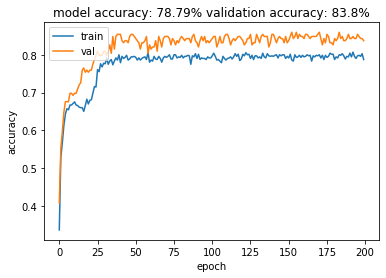

In [52]:
def plot_scores(history):
    from matplotlib import pyplot as plt
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    accuracy = round(history.history["accuracy"][-1]*100, 2)
    val_accuracy = round(history.history["val_accuracy"][-1]*100, 2)
    plt.title(f'model accuracy: {accuracy}% validation accuracy: {val_accuracy}%')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

plot_scores(history)

Like decision trees, neural networks are prone to overfitting.  
A combination of not enough samples, and complex networks can result in the network 'tuning in' perfectly on the training data. Overfitting.

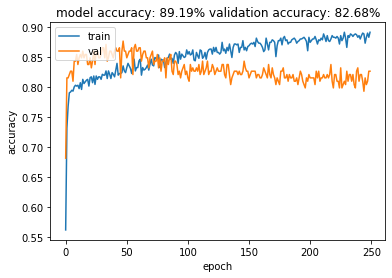

In [39]:
def create_complex_model():
    model = tf.keras.models.Sequential([

      tf.keras.layers.Dense(9, input_dim=9),
      tf.keras.layers.Dense(14, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(14, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_complex_model()
history = model.fit(X_train, y_train.values, epochs=250, validation_split=0.2, verbose=0)
plot_scores(history)

Neural networks tuning can also be done to prevent overfitting.  
The simplest, and most common approach is to add dropout layers.


Note: The neural network we've mostly talked about today was the standard 'dense' layer.   
But there are many more layers, of which the dropout layer is one.


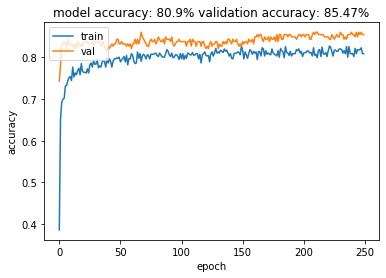

In [40]:
def create_complex_dropout_model():
    model = tf.keras.models.Sequential([

      tf.keras.layers.Dense(9, input_dim=9),
      tf.keras.layers.Dense(14, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(14, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_complex_dropout_model()
history = model.fit(X_train, y_train.values, epochs=250, validation_split=0.2, verbose=0)
plot_scores(history)

In [53]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
models = []
for train, test in kfold.split(X_train, y_train):
    model = create_complex_dropout_model();
    model.fit(X_train[train], y_train.iloc[train].values, epochs=50, batch_size=50, verbose=0)
    #evaluate the model
    scores = model.evaluate(X_train[test], y_train.iloc[test].values, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    models.append(model)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
acc_ann = np.mean(cvscores)

accuracy: 84.44%
accuracy: 78.89%
accuracy: 74.16%
accuracy: 83.15%
accuracy: 79.78%
accuracy: 85.39%
accuracy: 77.53%
accuracy: 80.90%
accuracy: 79.78%
accuracy: 80.68%
80.47% (+/- 3.15%)


In [42]:
    results = pd.DataFrame({
    'Model': ['Support Vector Machine', 'Logistic Regression', 
              'Artifical Neural Network',              
              'Decision Tree'],
    'Score': [acc_svc, acc_log, 
              acc_ann,  acc_decision_tree]})
results.sort_values(by='Score', ascending=False)


,Model,Score
0,Support Vector Machine,81.600000
2,Artifical Neural Network,81.366529
1,Logistic Regression,79.580000
3,Decision Tree,78.460000


In [43]:

svc = SVC(gamma='auto', kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test);

In [44]:
submission = pd.DataFrame({
        "PassengerId": testPassengerIds,
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)

## References

This notebook has been created based on

- [Titanic data science solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [Datascience example classification on flowers](https://nbviewer.jupyter.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb#Step-5:-Classification)
- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)